##Задания для самостоятельного выполнения



In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### 1. Загрузите датасет Olivetti faces;

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()


#### 2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.


In [ ]:
print(faces.DESCR)


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

####3. Выведите информацию о количественных параметрах датасета;


In [ ]:
print(f"Ключи датасета: {faces.keys()}")
print(f"Размер массива данных: {faces.data.shape}")
print(f"Размер массива целевых значений: {faces.target.shape}")
print(f"Количество классов: {len(set(faces.target))}")


Ключи датасета: dict_keys(['data', 'images', 'target', 'DESCR'])
Размер массива данных: (400, 4096)
Размер массива целевых значений: (400,)
Количество классов: 40


####4. Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;


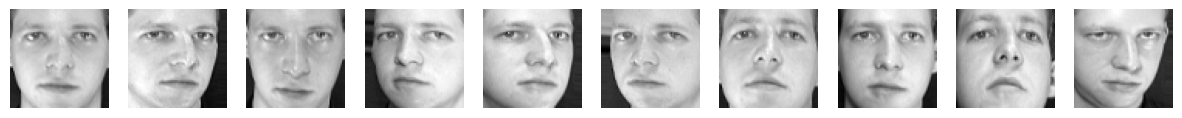

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    ax[i].imshow(faces.images[i], cmap='gray')
    ax[i].axis('off')
plt.show()


####5. Разделите эти данные на тестовую и обучающую выборки;


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=42)


####6. Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Обучение модели
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)


####7. Оцените качество модели на тестовой выборке с помощью следующих метрик:



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.97
Precision: 0.99
Recall: 0.98


####8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.


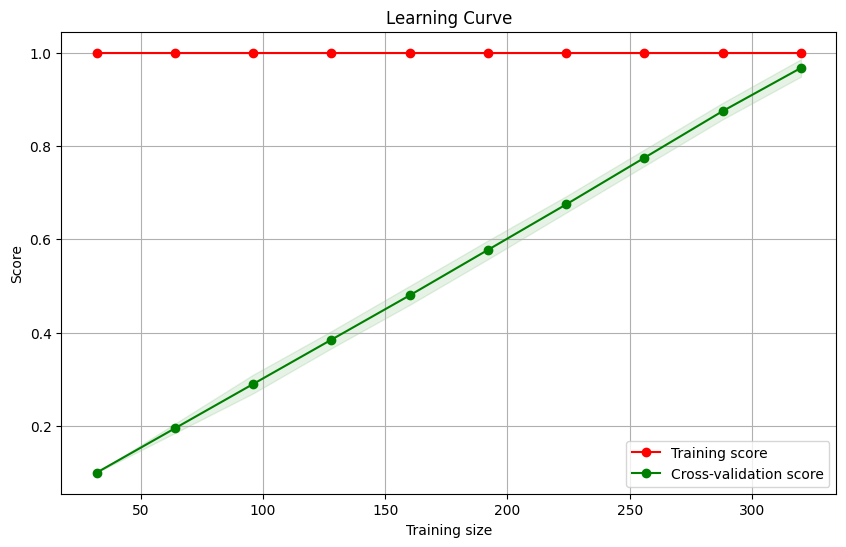

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(clf, faces.data, faces.target, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


На графике видно, что обучающая выборка показывает идеальные результаты (accuracy = 1.0) на всех размерах выборки, в то время как результаты кросс-валидации постепенно увеличиваются по мере увеличения размера обучающей выборки. Это указывает на переобучение модели. Модель слишком хорошо адаптировалась к обучающим данным и не обобщает их достаточно хорошо для новых данных.

####9. Сделайте вывод о применимости модели.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}

# Создадим  GridSearchCV
grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print(f"Лучшие параметры: {grid.best_params_}")

best_clf = grid.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Лучшие параметры: {'C': 0.1}
Accuracy: 0.97
Precision: 0.99
Recall: 0.98


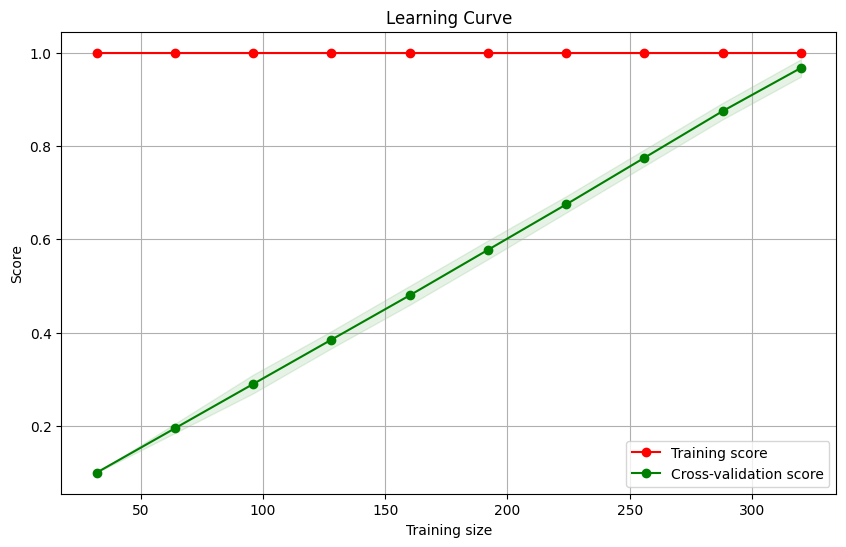

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(best_clf, faces.data, faces.target, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

Accuracy: 0.96
Precision: 0.94
Recall: 0.96
Лучшие параметры: {'C': 10, 'gamma': 0.01}


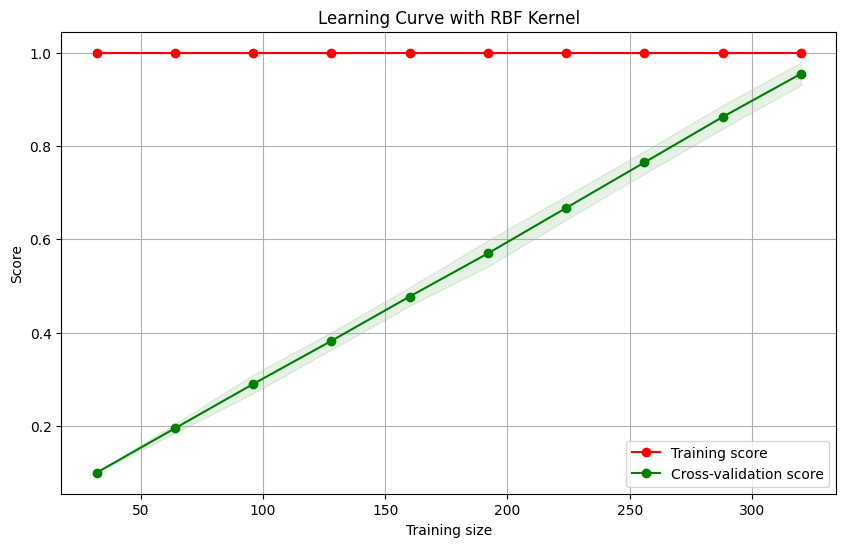

In [ ]:
# Определение параметров для GridSearchCV с RBF ядром
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, scoring='accuracy')
grid_rbf.fit(X_train, y_train)

best_clf_rbf = grid_rbf.best_estimator_

y_pred_rbf = best_clf_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='macro')
recall_rbf = recall_score(y_test, y_pred_rbf, average='macro')

print(f"Accuracy: {accuracy_rbf:.2f}")
print(f"Precision: {precision_rbf:.2f}")
print(f"Recall: {recall_rbf:.2f}")
print(f"Лучшие параметры: {grid_rbf.best_params_}")

train_sizes, train_scores, test_scores = learning_curve(best_clf_rbf, faces.data, faces.target, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title('Learning Curve with RBF Kernel')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()
